In [1]:
#installing yfinance library to acces yahoo finance data
!pip install yfinance


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [25]:
#assigning values to the variables to further access specified time period of data
ticker_symbol = "EURINR=X"
start_date = "2023-01-01"
end_date = "2024-02-16"
#eurinr_data = yf.download(ticker_symbol, start=start_date, end=end_date)
eurinr_data = yf.download(ticker_symbol, start=start_date, end="2024-02-23")

[*********************100%%**********************]  1 of 1 completed


In [26]:
#checking wheather data is present or not by viewing first 5 rows of data with the help of head() from pandas library
print(eurinr_data.head())

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2023-01-02  87.157700  88.400002  87.157700  88.482002  88.482002       0
2023-01-03  88.292000  88.313004  87.225998  88.300003  88.300003       0
2023-01-04  87.219002  87.922997  87.219002  87.219002  87.219002       0
2023-01-05  87.580002  87.807999  86.757004  87.605003  87.605003       0
2023-01-06  86.819000  87.614998  86.647003  86.827003  86.827003       0


In [27]:
# Fill missing values with a placeholder
eurinr_data.fillna('N/A', inplace=True)

In [28]:
# Calculate Moving Average for a 20-day window
eurinr_data['MA'] = eurinr_data['Close'].rolling(window=20).mean()

In [29]:
# Calculate 20-day Moving Average
eurinr_data['20 Day MA'] = eurinr_data['Close'].rolling(window=20).mean()
# Calculate Upper Bollinger Band using 20-day MA and 2 standard deviations
eurinr_data['Upper Band'] = eurinr_data['20 Day MA'] + 2*(eurinr_data['Close'].rolling(window=20).std())
# Calculate Lower Bollinger Band using 20-day MA and 2 standard deviations
eurinr_data['Lower Band'] = eurinr_data['20 Day MA'] - 2*(eurinr_data['Close'].rolling(window=20).std())

In [30]:
# Define a function to calculate Commodity Channel Index (CCI)
def CCI(data, ndays):
    TP = (data['High'] + data['Low'] + data['Close']) / 3
    CCI = pd.Series((TP - TP.rolling(window=ndays).mean()) / (0.015 * TP.rolling(window=ndays).std()),
                    name = 'CCI')
    return CCI
# Calculate CCI for a 20-day period
eurinr_data['CCI'] = CCI(eurinr_data, 20)
# Select data for one day (2024-02-16)
one_day_data = eurinr_data.loc['2024-02-16':'2024-02-16']
# Select data for one week (2024-02-16 to 2024-02-23)
one_week_data = eurinr_data.loc['2024-02-16':'2024-02-23']

In [42]:
# Display one day data with calculated indicators
print("One Day Data:")
print(one_day_data[['Close', 'MA', 'Upper Band', 'Lower Band', 'CCI']])

One Day Data:
                Close        MA  Upper Band  Lower Band        CCI
Date                                                              
2024-02-16  89.357002  89.63302   90.587914   88.678127 -49.223721


In [ ]:
# Display one week data with calculated indicators
print("\nOne Week Data:")
print(one_week_data[['Close', 'MA', 'Upper Band', 'Lower Band', 'CCI']])

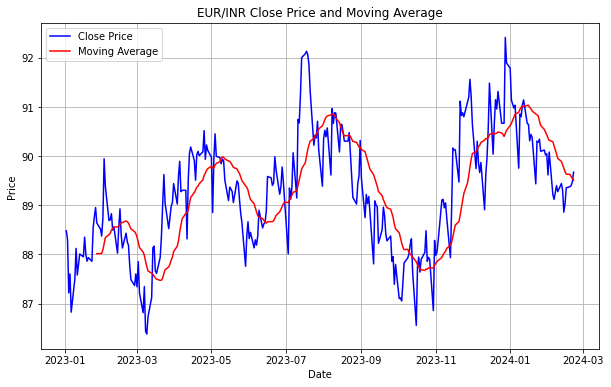

In [32]:
# Plotting Moving Average
plt.figure(figsize=(10, 6))
plt.plot(eurinr_data.index, eurinr_data['Close'], label='Close Price', color='blue')
plt.plot(eurinr_data.index, eurinr_data['MA'], label='Moving Average', color='red')
plt.title('EUR/INR Close Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

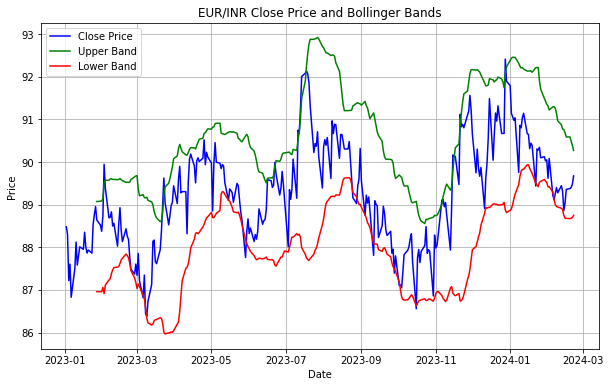

In [33]:
# Plotting Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(eurinr_data.index, eurinr_data['Close'], label='Close Price', color='blue')
plt.plot(eurinr_data.index, eurinr_data['Upper Band'], label='Upper Band', color='green')
plt.plot(eurinr_data.index, eurinr_data['Lower Band'], label='Lower Band', color='red')
plt.title('EUR/INR Close Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

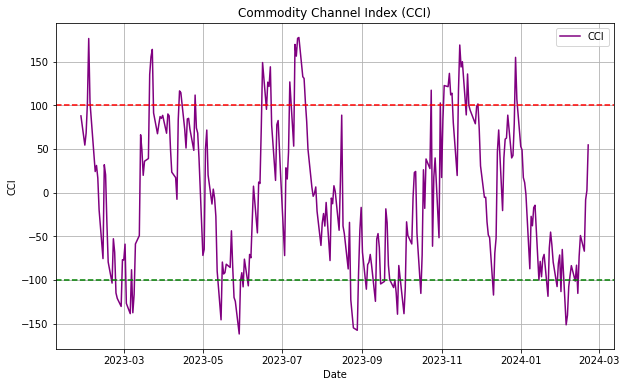

In [34]:
# Plotting CCI
plt.figure(figsize=(10, 6))
plt.plot(eurinr_data.index, eurinr_data['CCI'], label='CCI', color='purple')
plt.axhline(y=100, color='r', linestyle='--')
plt.axhline(y=-100, color='g', linestyle='--')
plt.title('Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.grid(True)
plt.show()

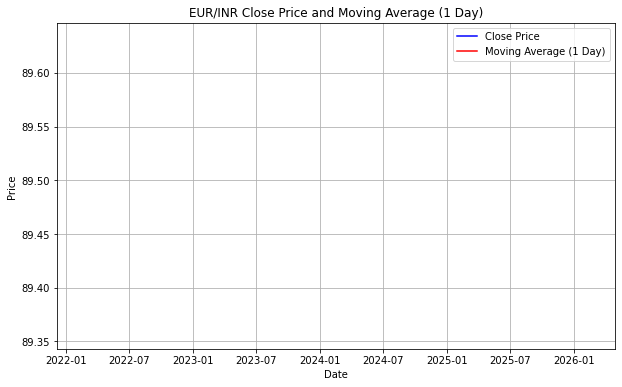

In [51]:
# Plotting Moving Average for one day and one week from February 16, 2024
plt.figure(figsize=(10, 6))
plt.plot(one_day_data.index, one_day_data['Close'], label='Close Price', color='blue')
plt.plot(one_day_data.index, one_day_data['MA'], label='Moving Average (1 Day)', color='red')
plt.title('EUR/INR Close Price and Moving Average (1 Day)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

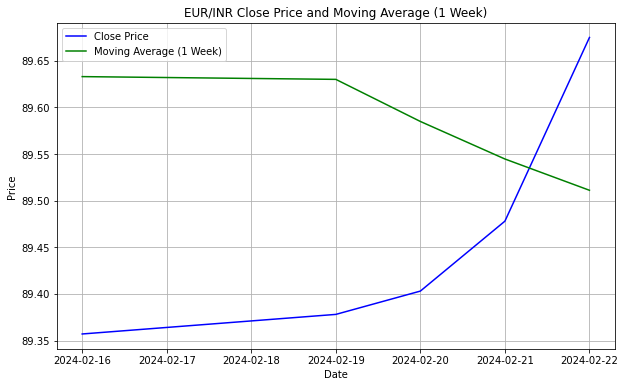

In [43]:
# Plotting Moving Average for one week from February 16, 2024
plt.figure(figsize=(10, 6))
plt.plot(one_week_data.index, one_week_data['Close'], label='Close Price', color='blue')
plt.plot(one_week_data.index, one_week_data['MA'], label='Moving Average (1 Week)', color='green')
plt.title('EUR/INR Close Price and Moving Average (1 Week)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

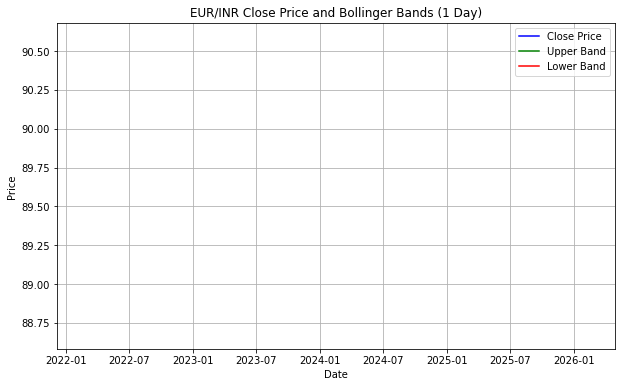

In [50]:
# Plotting Bollinger Bands for one day and one week from February 16, 2024
plt.figure(figsize=(10, 6))
plt.plot(one_day_data.index, one_day_data['Close'], label='Close Price', color='blue')
plt.plot(one_day_data.index, one_day_data['Upper Band'], label='Upper Band', color='green')
plt.plot(one_day_data.index, one_day_data['Lower Band'], label='Lower Band', color='red')
plt.title('EUR/INR Close Price and Bollinger Bands (1 Day)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

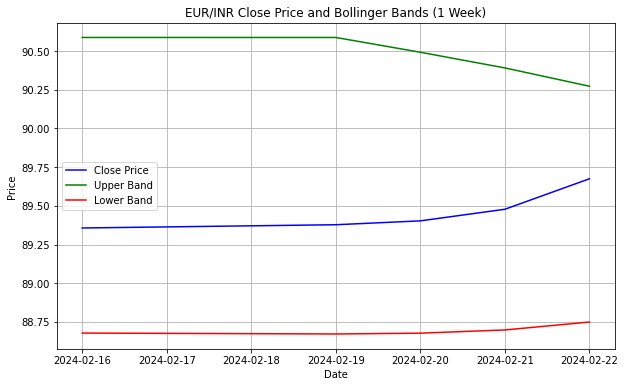

In [44]:
# Plotting Bollinger Bands for one week from February 16, 2024
plt.figure(figsize=(10, 6))
plt.plot(one_week_data.index, one_week_data['Close'], label='Close Price', color='blue')
plt.plot(one_week_data.index, one_week_data['Upper Band'], label='Upper Band', color='green')
plt.plot(one_week_data.index, one_week_data['Lower Band'], label='Lower Band', color='red')
plt.title('EUR/INR Close Price and Bollinger Bands (1 Week)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

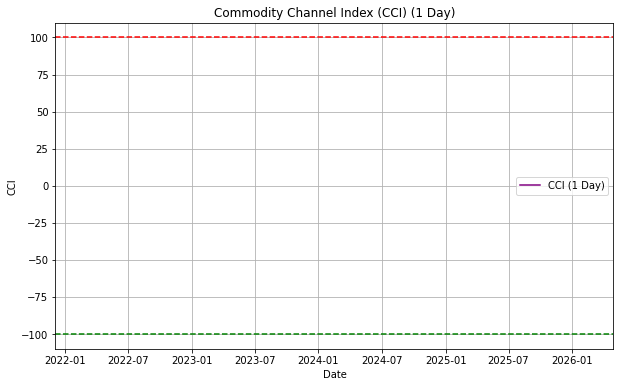

In [49]:
# Plotting CCI for one day and one week from February 16, 2024
plt.figure(figsize=(10, 6))
plt.plot(one_day_data.index, one_day_data['CCI'], label='CCI (1 Day)', color='purple')
plt.axhline(y=100, color='r', linestyle='--')
plt.axhline(y=-100, color='g', linestyle='--')
plt.title('Commodity Channel Index (CCI) (1 Day)')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.grid(True)
plt.show()

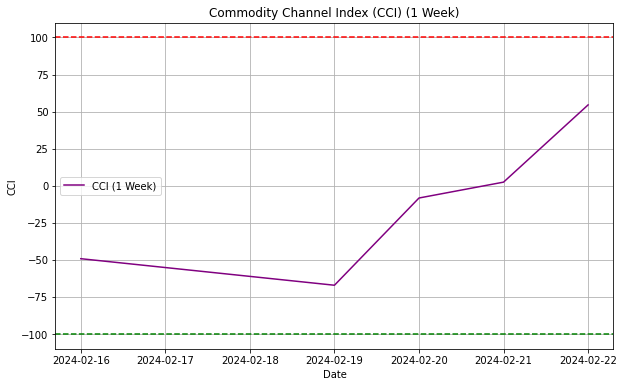

In [45]:
# Plotting CCI for one week from February 16, 2024
plt.figure(figsize=(10, 6))
plt.plot(one_week_data.index, one_week_data['CCI'], label='CCI (1 Week)', color='purple')
plt.axhline(y=100, color='r', linestyle='--')
plt.axhline(y=-100, color='g', linestyle='--')
plt.title('Commodity Channel Index (CCI) (1 Week)')
plt.xlabel('Date')
plt.ylabel('CCI')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
# Create a function to determine BUY, SELL, or NEUTRAL decision for Moving Average
def moving_average_decision(row):
    if row['Close'] > row['MA']:
        return 'BUY'
    elif row['Close'] < row['MA']:
        return 'SELL'
    else:
        return 'NEUTRAL'

# Create a function to determine BUY, SELL, or NEUTRAL decision for Bollinger Bands
def bollinger_bands_decision(row):
    if row['Close'] > row['Upper Band']:
        return 'BUY'
    elif row['Close'] < row['Lower Band']:
        return 'SELL'
    else:
        return 'NEUTRAL'

# Create a function to determine BUY, SELL, or NEUTRAL decision for CCI
def cci_decision(row):
    if row['CCI'] > 100:
        return 'BUY'
    elif row['CCI'] < -100:
        return 'SELL'
    else:
        return 'NEUTRAL'

# Determine decisions for one day February 16, 2024
one_day_decision = one_day_data.copy()
one_day_decision['MA Decision'] = one_day_decision.apply(moving_average_decision, axis=1)
one_day_decision['BB Decision'] = one_day_decision.apply(bollinger_bands_decision, axis=1)
one_day_decision['CCI Decision'] = one_day_decision.apply(cci_decision, axis=1)

# Determine decisions for one week from February 16 to February 23, 2024
one_week_decision = one_week_data.copy()
one_week_decision['MA Decision'] = one_week_decision.apply(moving_average_decision, axis=1)
one_week_decision['BB Decision'] = one_week_decision.apply(bollinger_bands_decision, axis=1)
one_week_decision['CCI Decision'] = one_week_decision.apply(cci_decision, axis=1)

In [46]:
# Display the decision tables for one day February 16, 2024
print("Decision Table for One Day (2024-02-16):")
print(one_day_decision[['MA Decision', 'BB Decision', 'CCI Decision']])

Decision Table for One Day (2024-02-16):
           MA Decision BB Decision CCI Decision
Date                                           
2024-02-16        SELL     NEUTRAL      NEUTRAL


In [47]:
# Display the decision tables for one week from February 16 to February 23, 2024
print("\nDecision Table for One Week (2024-02-16 to 2024-02-23):")
print(one_week_decision[['MA Decision', 'BB Decision', 'CCI Decision']])


Decision Table for One Week (2024-02-16 to 2024-02-23):
           MA Decision BB Decision CCI Decision
Date                                           
2024-02-16        SELL     NEUTRAL      NEUTRAL
2024-02-19        SELL     NEUTRAL      NEUTRAL
2024-02-20        SELL     NEUTRAL      NEUTRAL
2024-02-21        SELL     NEUTRAL      NEUTRAL
2024-02-22         BUY     NEUTRAL      NEUTRAL
